In [1]:
# import necessary packages
import os
import matplotlib.pyplot as plt
import geopandas as gpd
from descartes import PolygonPatch
import pandas as pd
import numpy as np
import seaborn as sns
import fiona
import cbsodata
import pyproj
import geoplot as gplt
import geoplot.crs as gcrs

In [2]:
buurten = gpd.read_file("output/buurten.shp")

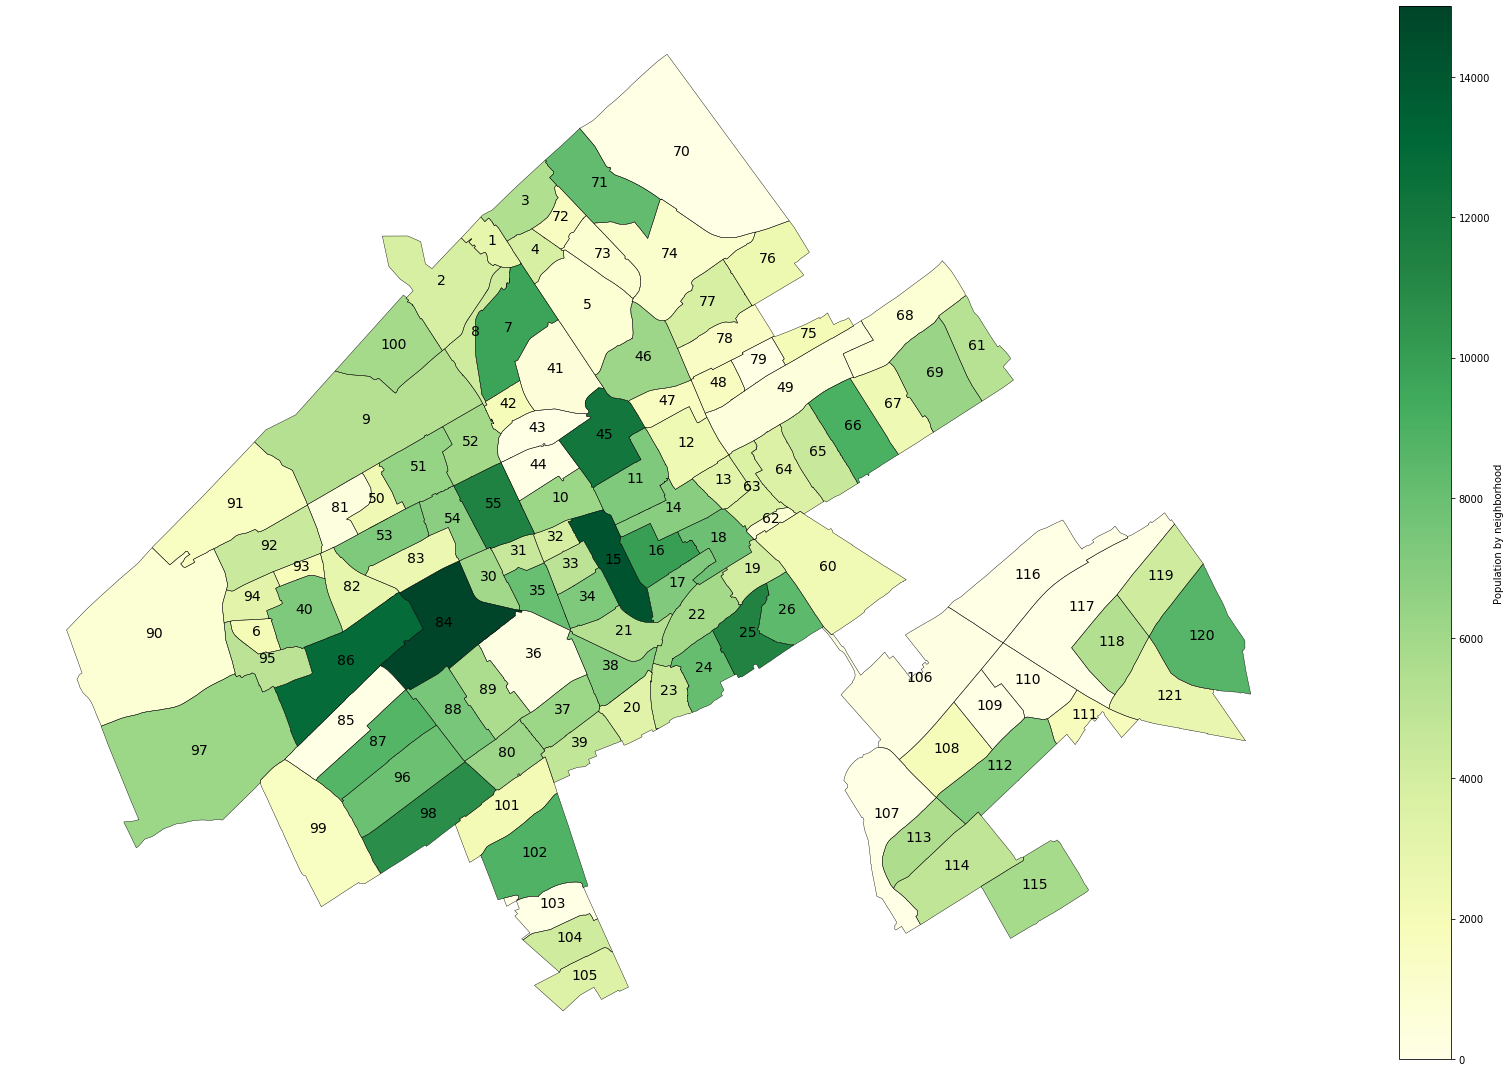

In [3]:
fig = plt.figure(1, figsize=(25,15)) 
ax = fig.add_subplot()

buurten.apply(lambda x: ax.annotate(s=x.BUURTCODE, xy=x.geometry.centroid.coords[0], ha='center', fontsize=14),axis=1);

buurten.boundary.plot(ax=ax, color='Black', linewidth=.4)

buurten.plot(ax=ax, cmap='YlGn', column='c_total', figsize=(12, 12),legend=True,
             legend_kwds={'label': "Population by neighborhood"}).axis('off')
fig.tight_layout()

In [4]:
buurt_data_19 = pd.DataFrame(cbsodata.get_data("84583NED"))

In [5]:
buurt_name_list = pd.read_csv("data/buurten.csv",sep=";")
buurt_code = buurt_name_list[["BUURTCODE","WIJKCODE","BUURTNAAM"]]

In [11]:
dh_buurt_data_19 = buurt_data_19[(buurt_data_19["Gemeentenaam_1"]=="'s-Gravenhage                           ") & (buurt_data_19["SoortRegio_2"]=="Buurt     ")]
total_dh_19 = dh_buurt_data_19[['WijkenEnBuurten','AantalInwoners_5','WestersTotaal_17','Marokko_19','NederlandseAntillenEnAruba_20','Suriname_21','Turkije_22','OverigNietWesters_23','GemiddeldeHuishoudensgrootte_32','GemiddeldeWoningwaarde_35','Koopwoningen_40','HuurwoningenTotaal_41','GIHandelEnHoreca_84','RUCultuurRecreatieOverigeDiensten_88','AfstandTotHuisartsenpraktijk_95','AfstandTotGroteSupermarkt_96','AfstandTotKinderdagverblijf_97','AfstandTotSchool_98']].rename(columns={'WijkenEnBuurten':'buurtname','AantalInwoners_5':'total_citizens','WestersTotaal_17':'total_western','Marokko_19':'morocco','NederlandseAntillenEnAruba_20':'antilles','Suriname_21':'suriname','Turkije_22':'turkey','OverigNietWesters_23':'other_non_western','GemiddeldeHuishoudensgrootte_32':'avg_household_size','GemiddeldeWoningwaarde_35':'avg_housevalue','Koopwoningen_40':'owned_houses','HuurwoningenTotaal_41':'rent_houses','GIHandelEnHoreca_84':'horeca_biz','RUCultuurRecreatieOverigeDiensten_88':'recreation_biz','AfstandTotHuisartsenpraktijk_95':'dist_GP','AfstandTotGroteSupermarkt_96':'dist_super','AfstandTotKinderdagverblijf_97':'dist_nursery','AfstandTotSchool_98':'dist_school'}, errors="raise").merge(buurt_code, left_on='buurtname', right_on='BUURTNAAM').set_index("BUURTCODE").drop("BUURTNAAM",axis=1)

In [12]:
total_dh_19[["WIJKCODE","buurtname","total_citizens"]]

,WIJKCODE,buurtname,total_citizens
BUURTCODE,,,
70,1,Oostduinen,0
71,2,Belgisch Park,8245
73,3,Westbroekpark,930
74,3,Duttendel,1075
48,4,Nassaubuurt,1610
...,...,...,...
117,43,De Rivieren,40
118,44,De Lanen,5440
119,44,De Velden,4200


In [8]:
total_dh_19.loc[44]

buurtname             Koningsplein en omgeving
total_citizens                            7520
total_western                             1790
morocco                                    155
antilles                                   135
suriname                                   535
turkey                                     160
other_non_western                          615
avg_household_size                         1.8
avg_housevalue                             256
owned_houses                                39
rent_houses                                 60
horeca_biz                                 160
recreation_biz                             250
dist_GP                                    0.3
dist_super                                 0.3
dist_nursery                               0.2
dist_school                               None
WIJKCODE                                    21
Name: 44, dtype: object

In [9]:
print(total_dh_19[["WIJKCODE","buurtname","total_citizens"]].sort_index().to_latex(longtable=True))

\begin{longtable}{lrlr}
\toprule
{} &  WIJKCODE &                             buurtname &  total\_citizens \\
BUURTCODE &           &                                       &                 \\
\midrule
\endhead
\midrule
\multicolumn{4}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
1         &         7 &                      Oud Scheveningen &            2915 \\
2         &         7 &                          Vissershaven &            3870 \\
3         &         7 &                Scheveningen Badplaats &            5495 \\
4         &         7 &                         Visserijbuurt &            3885 \\
5         &         6 &  Van Stolkpark en Scheveningse Bosjes &             765 \\
6         &        18 &                          Waldeck-Zuid &            2080 \\
7         &         9 &                        Statenkwartier &            9705 \\
8         &         9 &                        Geuzenkwartier &            4215 \\
9         &        13 & 